In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.append in-house Raman code
import Raman_read, Raman_find_polymer as rfp

In [4]:
# 20s 3 times, 25%
# $p : the path to Raman txt data
df = pd.DataFrame()
for genus in os.scandir(p): # list of dirs (-tetrasphaera, accumulibacter)
    datag = [] # data of genus i
    Xg,Yg = Raman_read.read_txt(genus.path,type="dir")
    Yg = Yg/20/(83.7/4/3) # adjust by experimental setups, 20sec & 83.7/4mW with filter, 3mW for the spectra in IUE
    mol = rfp.find_single_polymer(Xg,Yg,1172) # molecular intensity of each single cells
    mol.name = genus.name
    df = pd.concat([df,mol],axis=1)
df.columns = df.columns.to_series().apply(lambda x: x.split("_")[1])

'a'

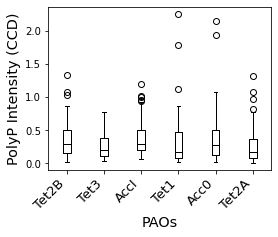

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
df.plot(kind='box',rot=45,ax=ax,widths=.2,color=dict(boxes='k', whiskers='k', medians='k', caps='k'))
ax.set_xticklabels(ax.get_xticklabels(),ha='right',fontsize=13)
ax.set_ylabel("PolyP Intensity (CCD)",fontsize='x-large')
ax.set_xlabel("PAOs",fontsize='x-large')
fig.savefig("PAOinAT.png",bbox_inches='tight',dpi=600)

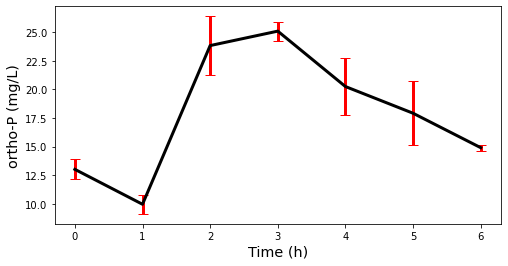

In [3]:
# p_ortho : path for P uptake data
df = pd.read_excel(p_ortho,sheet_name='plot')
time = df.iloc[:,0]
ave = df.iloc[:,1]
std = df.iloc[:,2]
fig = plt.figure(figsize=(8,4))
plt.errorbar(time,ave,std,color='k',lw=3,ecolor='r',capsize=5)
plt.xlabel('Time (h)',fontsize='x-large')
plt.ylabel('ortho-P (mg/L)',fontsize='x-large')
fig.savefig(r'/Users/zijianleowang/Desktop/Projects_in_Cornell/RACE/ortho-P.jpg',bbox_inches='tight')